<a href="https://colab.research.google.com/github/SzymSAS/lecture1/blob/main/systemy_rekomendacyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [4]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.rating.value_counts()

,count
rating,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [8]:
ratings['rating'].count()

100836

In [9]:
movies['movieId'].nunique()

9742

In [10]:
ratings['userId'].nunique()

610

In [11]:
average_ratings_per_user = ratings.groupby('userId')['rating'].count().mean()
print(f'{average_ratings_per_user=}')

average_ratings_per_user=165.30491803278687


In [12]:
average_ratings_per_movie = ratings.groupby('movieId')['rating'].count().mean()
print(f'{average_ratings_per_movie=}')

average_ratings_per_movie=10.369806663924312


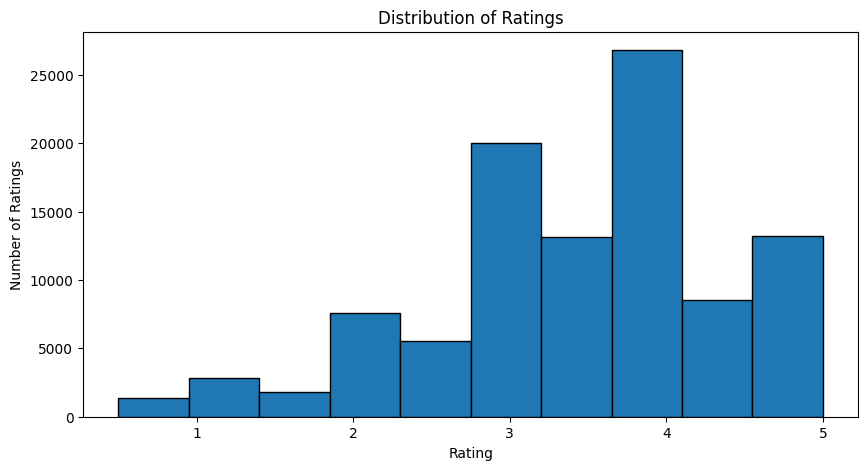

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(ratings['rating'], bins=10, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Ratings')
plt.show()

In [14]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

In [15]:
C = ratings['rating'].count().mean()
m = ratings['rating'].mean()

def bayesian_avg(ratings):
  bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
  return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movies_with_bayesian = movies.merge(bayesian_avg_ratings, on='movieId')

print("\n5 wierszy danych o filmach z wartością średniej oceny bayesowskiej:")
print(movies_with_bayesian.head())


5 wierszy danych o filmach z wartością średniej oceny bayesowskiej:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  bayesian_avg  
0  Adventure|Animation|Children|Comedy|Fantasy      3.502449  
1                   Adventure|Children|Fantasy      3.501481  
2                               Comedy|Romance      3.501432  
3                         Comedy|Drama|Romance      3.501478  
4                                       Comedy      3.501348  


In [16]:
def find_recommendations(movie_title, num_recommendations=10):

    movie_id = movies[movies['title'] == movie_title]['movieId'].values[0] if len(movies[movies['title'] == movie_title]) > 0 else None

    if movie_id is not None:
        recommendations = movies_with_bayesian.sort_values('bayesian_avg', ascending=False)
        recommendations = recommendations[recommendations['movieId'] != movie_id]
        return recommendations.head(num_recommendations)
    else:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return None


recommendations = find_recommendations("Toy Story (1995)", 10)

if recommendations is not None:
    print(recommendations[['title', 'bayesian_avg']])

                                                  title  bayesian_avg
277                    Shawshank Redemption, The (1994)      3.504464
314                                 Forrest Gump (1994)      3.503712
257                                 Pulp Fiction (1994)      3.503668
1938                                 Matrix, The (1999)      3.503456
510                    Silence of the Lambs, The (1991)      3.503377
224           Star Wars: Episode IV - A New Hope (1977)      3.503368
2224                                  Fight Club (1999)      3.503221
461                             Schindler's List (1993)      3.503132
659                               Godfather, The (1972)      3.503054
897   Star Wars: Episode V - The Empire Strikes Back...      3.503048


In [17]:
!pip uninstall numpy -y
!pip uninstall suprise -y

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [18]:
!pip install numpy==1.23.5
!pip install surprise

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2463313 sha256=3788f7cc8403ed6851d898b563b8c3ea3a695f6e11f4b9450deca45da2a211de
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [22]:
!pip uninstall surprise -y

Found existing installation: surprise 0.1
Uninstalling surprise-0.1:
  Successfully uninstalled surprise-0.1


In [23]:
!pip install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)


In [25]:
!pip uninstall numpy -y

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5


In [27]:
!pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 r

In [1]:
from surprise.model_selection import cross_validate, GridSearchCV
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise import Dataset
from surprise import Reader

In [17]:
min_rating = ratings.rating.min()
max_rating = ratings.rating.max()
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [18]:
model = SVD()
model.fit(data.build_full_trainset())

user_id = 600

all_movies = movies['movieId'].unique()

predictions = []
for movie_id in all_movies:
    predictions.append(model.predict(user_id, movie_id))

predictions.sort(key=lambda x: x.est, reverse=True)

top_10_recommendations = predictions[:10]

print("Top 10 recommendations for user ID 600:")
for prediction in top_10_recommendations:
    movie_title = movies[movies['movieId'] == prediction.iid]['title'].iloc[0]
    print(f"Movie: {movie_title}, Predicted Rating: {prediction.est}")

Top 10 recommendations for user ID 600:
Movie: Lord of the Rings: The Fellowship of the Ring, The (2001), Predicted Rating: 4.775788782909297
Movie: Spirited Away (Sen to Chihiro no kamikakushi) (2001), Predicted Rating: 4.662818186303708
Movie: Lord of the Rings: The Two Towers, The (2002), Predicted Rating: 4.59201330534381
Movie: Memento (2000), Predicted Rating: 4.467391784954883
Movie: Grand Budapest Hotel, The (2014), Predicted Rating: 4.457249678062774
Movie: Seven (a.k.a. Se7en) (1995), Predicted Rating: 4.448269979548182
Movie: Princess Bride, The (1987), Predicted Rating: 4.414446209291966
Movie: Eternal Sunshine of the Spotless Mind (2004), Predicted Rating: 4.381134965344054
Movie: Lord of the Rings: The Return of the King, The (2003), Predicted Rating: 4.364505380128844
Movie: Annie Hall (1977), Predicted Rating: 4.346889098795348


In [24]:
toy_story_movie_id = movies[movies['title'] == "Toy Story (1995)"]['movieId'].iloc[0]
toy_story_watchers = ratings[ratings['movieId'] == toy_story_movie_id]['userId'].unique()

if len(toy_story_watchers) > 0:
  first_user_id_toy_story = toy_story_watchers[0]
  print(f"The first user who watched 'Toy Story (1995)' has user ID: {first_user_id_toy_story}")

  all_movies = movies['movieId'].unique()
  predictions = []
  for movie_id in all_movies:
      predictions.append(model.predict(first_user_id_toy_story, movie_id))

  predictions.sort(key=lambda x: x.est, reverse=True)

  top_10_recommendations = predictions[:10]

  print(f"Top 10 recommendations for user ID {first_user_id_toy_story}:")
  for prediction in top_10_recommendations:
      movie_title = movies[movies['movieId'] == prediction.iid]['title'].iloc[0]
      print(f"Movie: {movie_title}, Predicted Rating: {prediction.est}")
else:
  print("No user found who watched 'Toy Story (1995)'.")

The first user who watched 'Toy Story (1995)' has user ID: 1
Top 10 recommendations for user ID 1:
Movie: Taxi Driver (1976), Predicted Rating: 5.0
Movie: Hoop Dreams (1994), Predicted Rating: 5.0
Movie: Star Wars: Episode IV - A New Hope (1977), Predicted Rating: 5.0
Movie: Shawshank Redemption, The (1994), Predicted Rating: 5.0
Movie: In the Name of the Father (1993), Predicted Rating: 5.0
Movie: Schindler's List (1993), Predicted Rating: 5.0
Movie: Ghost in the Shell (Kôkaku kidôtai) (1995), Predicted Rating: 5.0
Movie: Wallace & Gromit: A Close Shave (1995), Predicted Rating: 5.0
Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Predicted Rating: 5.0
Movie: Godfather, The (1972), Predicted Rating: 5.0
